# Building a brain object

Brain objects are superEEG's fundamental data structure for a single subject's iEEG data.  To create one at minimum you'll need a matrix of neural recordings (time samples by electrodes), electrode locations, and a sample rate. Additionally, you can include information about separate recording sessions and store custom meta data. In this tutorial, we'll build a brain object from scratch and get familiar with some of the methods.

# Load in the required libraries

In [31]:
import superEEG as se
import numpy as np
import seaborn as sns

# Simulate some data

First, we'll use superEEG's built in simulation functions to simulate some data and electrodes. By default, the `simualate_data` function will return a 1000 samples by 10 electrodes matrix, but you can specify the number of time samples with `n_samples` and the number of electrodes with `n_elecs`:

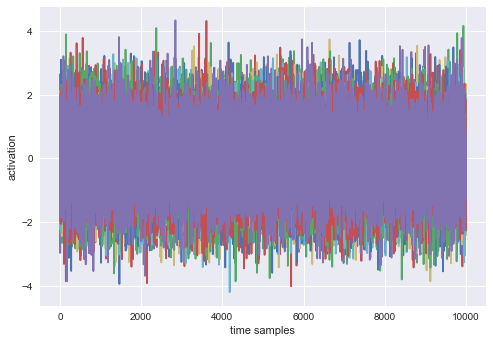

In [32]:
# simulate some data
data = se.simulate_data(n_samples=10000, n_elecs=10)

# plot it
sns.plt.plot(data)
sns.plt.xlabel('time samples')
sns.plt.ylabel('activation')
sns.plt.show()

We'll also simulate some electrode locations

In [33]:
locs = se.simulate_locations()
print(locs)

[[-69   4  42]
 [ 12 -42  39]
 [-10   5   5]
 [ 38  28  54]
 [ 24  28 -13]
 [ 43 -58 -20]
 [-34 -61   0]
 [-65  45 -21]
 [ 53   5  28]
 [ 42 -71 -45]]


# Creating a brain object

To construct a new brain objects, simply pass the data and locations to the `Brain` class like this:

In [34]:
bo = se.Brain(data=data, locs=locs, sample_rate=1000)

To view a summary of the contents of the brain object, you can call the `info` function:

In [35]:
bo.info()

Number of electrodes: 10
Recording time in seconds: 10
Number of sessions: 1
Date created: Fri Aug 11 13:54:57 2017
Meta data: None


Optionally, you can pass a `sessions` parameter, which is a numpy array the length of your data with a unique identifier for each session.  For example:

In [36]:
sessions = np.array([1]*(data.shape[0]/2)+[2]*(data.shape[0]/2))
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions)
bo.info()

Number of electrodes: 10
Recording time in seconds: 10
Number of sessions: 2
Date created: Fri Aug 11 13:54:57 2017
Meta data: None


You can also pass add custom meta data to the brain object to help keep track of its contents. `meta` is a dictionary comprised of whatever you want:

In [37]:
meta = {
    'subjectID' : '123',
    'Investigator' : 'Andy',
    'Hospital' : 'DHMC'
}
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions, meta=meta)
bo.info()

Number of electrodes: 10
Recording time in seconds: 10
Number of sessions: 2
Date created: Fri Aug 11 13:54:58 2017
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


# The structure of a brain object

Inside the brain object, the iEEG data is stored as a Pandas DataFrame that can be accessed directly:

In [38]:
bo.data.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.086132,0.197329,1.417637,0.782145,0.736076,0.457981,0.023041,-0.344367,-0.187389,1.057613
1,0.407021,-1.946625,-0.638839,2.601072,-0.217603,-1.963998,-1.138026,-0.458269,-0.696232,0.486504
2,-0.182730,-1.609463,-1.137262,0.405852,0.317980,1.039807,-0.219537,-0.405692,0.234617,1.635252
3,-0.364830,1.401106,0.893642,-0.742213,-0.121812,-1.219805,-0.772420,0.952280,-0.791053,-1.842831
4,-0.147239,0.326605,0.723139,-0.479844,0.654035,-2.225586,-0.736637,-0.829818,-1.493470,1.342313


or returned as a numpy array using the `get_data` method:

In [39]:
bo.get_data()

array([[-1.0861323 ,  0.19732905,  1.41763664, ..., -0.3443667 ,
        -0.18738943,  1.05761258],
       [ 0.40702126, -1.94662453, -0.63883903, ..., -0.45826938,
        -0.69623227,  0.4865039 ],
       [-0.18273017, -1.60946292, -1.13726231, ..., -0.40569195,
         0.23461741,  1.63525161],
       ..., 
       [ 0.47636423, -0.28983745, -0.62726027, ..., -0.43333883,
        -1.89193893, -1.2615082 ],
       [ 1.8905333 ,  1.98205494, -0.4261987 , ...,  1.27160915,
        -0.59909178, -1.28916728],
       [-0.44933867,  0.50876662, -0.7653076 , ..., -0.14794376,
        -0.40276797,  0.32225198]])

Similarly, the electrode locations are stored as a Pandas DataFrame, and can be retrieved as a numpy array using the `get_locs` method:

In [40]:
bo.locs.head()

,x,y,z
0,-69,4,42
1,12,-42,39
2,-10,5,5
3,38,28,54
4,24,28,-13


In [41]:
bo.get_locs()

array([[-69,   4,  42],
       [ 12, -42,  39],
       [-10,   5,   5],
       [ 38,  28,  54],
       [ 24,  28, -13],
       [ 43, -58, -20],
       [-34, -61,   0],
       [-65,  45, -21],
       [ 53,   5,  28],
       [ 42, -71, -45]])

The other peices of the brain object are listed below:

In [42]:
# array of session identifiers for each timepoint
sessions = bo.sessions

# number of sessions
n_sessions = bo.n_sessions

# sample rate
sample_rate = bo.sample_rate

# number of electrodes
n_elecs = bo.n_elecs

# length of recording in seconds
n_seconds = bo.n_secs

# the date and time that the bo was created
date_created = bo.date_created

# kurtosis of each electrode
kurtosis = bo.kurtosis

# meta data
meta = bo.meta

# Brain object methods

There are a few other useful methods on a brain object

## `bo.info()`

This method will give you a summary of the brain object:

In [43]:
bo.info()

Number of electrodes: 10
Recording time in seconds: 10
Number of sessions: 2
Date created: Fri Aug 11 13:54:58 2017
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


## `bo.get_data()`

This method will return a numpy array of the data:

In [44]:
data_array = bo.get_data()

## `bo.get_locs()`

This method will return a numpy array of the electrode locations:

In [45]:
locs = bo.get_locs()

## `bo.save('filepath')`

This method will save the brain object to the specified file location:

In [46]:
bo.save('brain_object')

Brain object saved as pickle.


## `bo.to_nii()`

This method converts the brain object into a `nibabel` nifti image.  If `filepath` is specified, the nifti file will be saved. You can also specify a nifti template with the `template` argument.

In [47]:
nii = bo.to_nii()
print(type(nii))

# save the file
# nii = bo.to_nii(filepath='/path/to/file/brain')

# specify a template
# nii = bo.to_nii(template='/path/to/nifti/file.nii')

<class 'nibabel.nifti1.Nifti1Image'>
